# Computed Tomography

In [1]:
import numpy as np
import scipy.sparse.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat

The following example is a tomographic X-ray data of a walnut. The dataset was prepared by the [Finnish Inverse Problems Society](http://www.fips.fi/dataset.php).

## Measurement Matrix $A$

In [2]:
data = loadmat('./data/Data82.mat')

In [3]:
A = data['A']

In [4]:
A.data.nbytes

7762752

In [5]:
A.shape

(9840, 6724)

In [9]:
type(A)

scipy.sparse.csc.csc_matrix

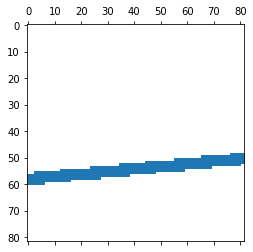

Row:  300


In [20]:
index = 300 #np.random.randint(0,A.shape[0])
proj = A[index,:].reshape(82,82)
plt.spy(proj)
plt.show()
print('Row: ',index)

## Sinogram: Measured Projections

In [22]:
sinogram = data['m']

In [23]:
sinogram.nbytes

78720

In [24]:
sinogram.shape

(82, 120)

In [25]:
type(sinogram)

numpy.ndarray

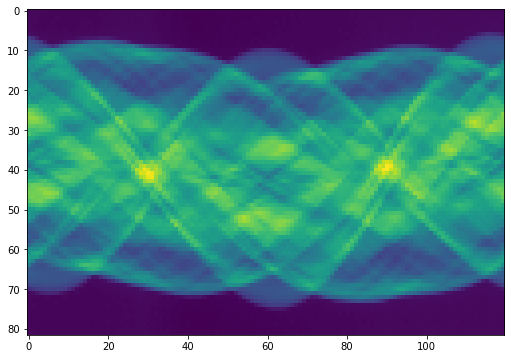

In [26]:
plt.figure(figsize=(10,6))
plt.imshow(sinogram)
plt.show()

## Compute Least Squares Solution

In [28]:
b = sinogram.reshape([82*120,1],order='F')

In [32]:
result = la.lsmr(A,b,atol=1e-10,btol=1e-10)

In [33]:
x = result[0]

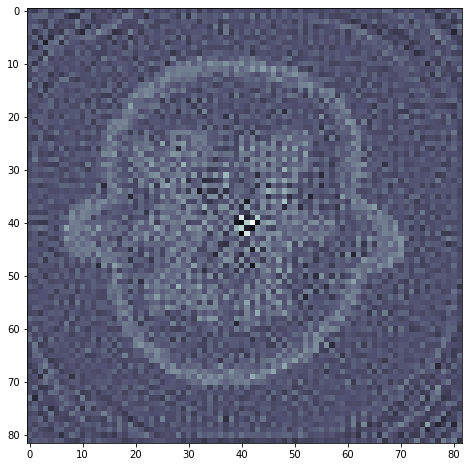

In [34]:
plt.figure(figsize=(8,8))
plt.imshow(x.reshape(82,82).T,cmap='bone')
plt.show()

## True Solution

![Solution of Computed Tomorgraphy Example](./data/ct_solution.png)